#I. Portada:


I.1 

*   Benjamín Salinas
*   Juan Osorio
*   Sebastián Salazar


#II. Introducción:

Descripción del Problema: La alta tasa de fuga voluntaria de clientes, la falta de claridad sobre el perfil de los clientes fugitivos y las razones de su fuga.

De las cuales sugen la interrogante: ¿Qué busca la entidad financiera?

Para esto se busca:

*   Identificar características comunes entre clientes que se fugan.
*   Descubrir comportamientos o variables críticas que anticipan la fuga.

En el informe se detallará el proceso de preprocesamiento de la base de datos, el análisis descriptivo, la transformación de variables, la selección y ranking de atributos, junto con las conclusiones obtenidas.

Objetivos del analisis:

*   Identificar y corregir problemas en la base de datos.
*   Realizar un análisis descriptivo de los datos.
*   Transformar variables y generar nuevos indicadores con potencial predictivo.
*   Analizar la capacidad discriminatoria de las variables entre clientes fugados juntos con los  no fugados, y elaborar un ranking de relevancia.
*   Proveer recomendaciones a la jefatura basadas en los hallazgos.

#III. Análisis Estadístico de los Datos:



Lo primero, es instalar los módulos o librerías que nos permitirán hacer ciencia de datos con la información de la base, en este caso las librerías de Numpy, Jedi, etc.

In [ ]:
#!pip -q install gensim scikit-learn
!pip install --upgrade numpy scipy
!pip install gensim scikit-learn
!pip install jedi
!pip install --upgrade --force-reinstall numpy pandas google-colab torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 16.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.0
    Uninstalling scipy-1.16.0:
      Successfully uninstalled scipy-1.16.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.3.2 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.2 whi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.2
    Uninstalling numpy-2.3.2:
      Successfully uninstalled numpy-2.3.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatibl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.8 MB/s eta 0:00:00
  Using cached numpy-2.3.2-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 2.6 MB/s eta 0:00:00
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement google-colab (from versions: none)
ERROR: No matching distribution found for google-colab


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from pandas.api.types import is_numeric_dtype
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import SelectKBest, f_classif
np.set_printoptions(suppress=True)

Posteriormente, cargamos el documento en bruto con la información que queremos analizar o estudiar.

In [ ]:
ruta_data_set = '/content/Base_Fuga_DABI_M1.xlsx'
data_set = pd.read_excel(ruta_data_set)

Con la base de datos cargada, procedemos a identificar cada una de las variables (columnas) del documento:

Descripción de variables de la base de datos:
1.	FUGA: F=cliente fugado, NF= cliente activo (variable objetivo, última columna)
2.	CreditMes_T: Crédito en mes T
3.	CreditMes_T-1: Crédito en mes T-1
4.	CreditMes_T-2: Crédito en mes T-2
5.	NumTarjCred_T: Número de tarjetas de crédito en mes T
6.	NumTarjCred_T-1: Número de tarjetas de crédito en mes T-1
7.	NumTarjCred_T-2: Número de tarjetas de crédito en mes T-2
8.	Ingreso: Ingreso cliente
9.	Edad: Edad cliente
10.	NumTransWeb_T: Número de transacciones en web en mes T
11.	NumTransWeb_T-1: Número de transacciones en web en mes T-1
12.	NumTransWeb_T-2: Número de transacciones en web en mes T-2
13.	MargenComp_T: Margen del cliente para la compañía en mes T
14.	MargenComp_T-1: Mmargen del cliente para la compañía en mes T-1
15.	MargenComp_T-2: Margen del cliente para la compañía en mes T-2
16.	MargenComp_T-3: Margen del cliente para la compañía en mes T-3
17.	MargenComp_T-4: Margen del cliente para la compañía en mes T-4
18.	MargenComp_T-5: Margen del cliente para la compañía en mes T-5
19.	MargenComp_T-6: Margen del cliente para la compañía en mes T-6
20.	Telefono: La compañia posee el numero de telefono del cliente
21.	NivelEduc: Nivel Educacional del cliente
22.	Genero: Genero del cliente
23.	EstCivil: Estado civil del cliente
24.	Region: Region donde vive el cliente

Descritas las variables, comenzamos con el análisis exploratorio de datos.

**Análisis Exploratorio de Datos.**

In [ ]:
data_set.describe(include='all').round(1)

,CreditMes_T,CreditMes_T-1,CreditMes_T-2,NumTarjCred_T,NumTarjCred_T-1,NumTarjCred_T-2,Ingreso,Edad,NumTransWeb_T,NumTransWeb_T-1,...,MargenComp_T-3,MargenComp_T-4,MargenComp_T-5,MargenComp_T-6,Telefono,NivelEduc,Genero,EstCivil,Region,FUGA
count,5603.0,5605.0,5605.0,5598.0,5603.0,5605.0,5605.0,5605.0,5603.0,5603.0,...,5605.0,5603.0,5604.0,5605.0,5605,5602,5605,5603,5605,5605
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,4,3,4,1,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,SI,UNI,M,CAS,RM,NF
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5605,3627,3895,2960,5605,4889
mean,1021484.8,632812.1,583796.3,0.8,0.8,0.8,1223802.4,35.9,5.2,3.9,...,253053.6,253046.6,260956.4,195991.5,NaN,NaN,NaN,NaN,NaN,NaN
std,115216.5,127733.6,80016.5,0.7,0.7,0.7,562272.8,9.2,11.3,8.5,...,2472.4,2546.6,1653.4,3001.6,NaN,NaN,NaN,NaN,NaN,NaN
min,912650.0,500000.0,500000.0,0.0,0.0,0.0,-975950.0,15.0,0.0,0.0,...,100000.0,157840.0,183560.0,137500.0,NaN,NaN,NaN,NaN,NaN,NaN
25%,990500.0,597200.0,562100.0,0.0,0.0,0.0,890450.0,29.0,0.0,0.0,...,252840.0,252960.0,260800.0,195380.0,NaN,NaN,NaN,NaN,NaN,NaN
50%,997700.0,604850.0,566150.0,1.0,1.0,1.0,1057650.0,33.0,0.0,1.0,...,252960.0,253040.0,260880.0,195640.0,NaN,NaN,NaN,NaN,NaN,NaN
75%,1014800.0,623300.0,577400.0,1.0,1.0,1.0,1362600.0,41.0,6.0,5.0,...,253260.0,253320.0,261100.0,196420.0,NaN,NaN,NaN,NaN,NaN,NaN


Dada el conjunto de datos, podemos identificar VP (Variables Perdidas), Inconsistencias y otras características de la data sin procesar.

Existen celdas vacías en variables tales como CreditMes_T, NumTarjCred_T, NumTarjCred_T-1, Num_TransWeb_T, NumTransWeb_T-1, MargenComp_T, MargenComp_T-1, MargenComp_T-4, MargenComp_T-5, Nivel Educacional. No se observa una cantidad relevante de datos faltantes, considerando que en el peor escenario una columna tiene un 0,00125% de datos faltantes.

El cálculo de frecuencia (freq) y top, nos permite identificar que es probable que existan variables con poca relevancia en el análisis, como por ejemplo, la columna Teléfono y Columna Región, dado que presentan un dato que se repite en las 5605 muestras.

El cálculo del promedio (mean), con un resultado de 0.8 en las 3 columnas que indican el número de tarjetas de los clientes, nos permite adelantar que probablemente tengamos que "normalizar" las variables para poder realizar el análisis de estas.

Con el mínimo, podemos identificar errores en la data, probablemente de digitación, donde la columna edad presenta una edad de 15 años y donde el ingreso presenta un dato negativo.

Con el cálculo del máximo podemos identificar un dato de edad erróneo, dado que da cuenta de una persona con 131 años.

In [ ]:
print(data_set)

      CreditMes_T  CreditMes_T-1  CreditMes_T-2  NumTarjCred_T  \
0       1031900.0         666500         608000            2.0   
1       1078700.0         634100         583250            0.0   
2       1076000.0         708800         621950            1.0   
3        995450.0         599900         564350            1.0   
4       1052150.0         609800         572450            1.0   
...           ...            ...            ...            ...   
5600     989600.0         596300         561650            0.0   
5601     990050.0         597200         562100            1.0   
5602     990050.0         596750         562100            0.0   
5603     990500.0         596750         562100            0.0   
5604     990500.0         597200         562100            2.0   

      NumTarjCred_T-1  NumTarjCred_T-2  Ingreso  Edad  NumTransWeb_T  \
0                 2.0                2  1050050    30            1.0   
1                 0.0                0   830600    38          

**Visualización de datos perdidos.**

In [ ]:
data_set.isnull().sum()

,0
CreditMes_T,2
CreditMes_T-1,0
CreditMes_T-2,0
NumTarjCred_T,7
NumTarjCred_T-1,2
NumTarjCred_T-2,0
Ingreso,0
Edad,0
NumTransWeb_T,2
NumTransWeb_T-1,2


De acuerdo a la visualización de los datos, se identifica que el % de datos de perdidos totales es mínima. Con un 0,00125% en el peor escenario

** **texto en negrita**Visualización Gráfica de los datos a nivel exploratorio**

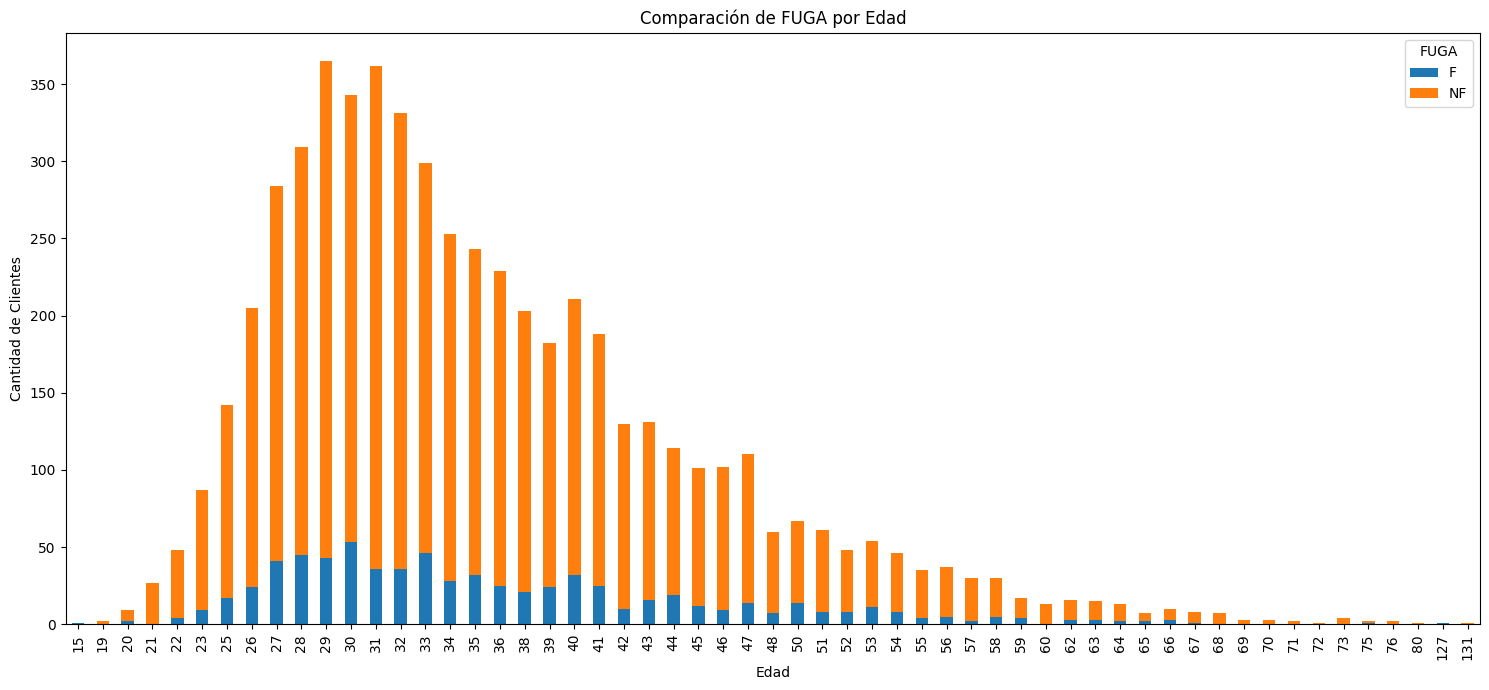

In [ ]:
# prompt: Genera un gráfico apilado de comparación de edad en el eje x vs FUGA

# Agrupar por 'Edad' y 'FUGA', y contar las ocurrencias
df_grouped = data_set.groupby(['Edad', 'FUGA']).size().reset_index(name='Count')
# Pivotea la tabla para tener 'Edad' como índice y 'FUGA' como columnas
df_pivot = df_grouped.pivot(index='Edad', columns='FUGA', values='Count').fillna(0)
# Generar el gráfico de barras apiladas
df_pivot.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Comparación de FUGA por Edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=90)
plt.legend(title='FUGA')
plt.tight_layout()
plt.show()

Analizando el campo edad, es una variable que permita segmentar o identificar que segmento de edad se está fugando por lo que se analizarán otras variables.

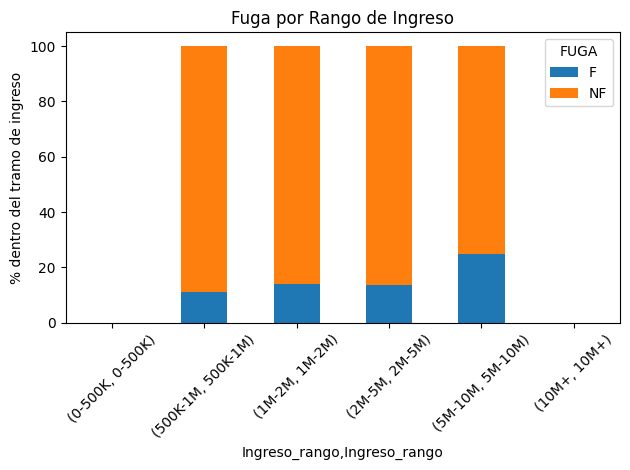

In [ ]:
# Convertir Ingreso a numérico si no lo es
data_set['Ingreso'] = pd.to_numeric(data_set['Ingreso'], errors='coerce')


# Crear tramos de ingreso (puedes ajustar los bins)
bins = [0, 500000, 1000000, 2000000, 5000000, 10000000, float('inf')]
labels = ['0-500K', '500K-1M', '1M-2M', '2M-5M', '5M-10M', '10M+']


data_set['Ingreso_rango'] = pd.cut(data_set['Ingreso'], bins=bins, labels=labels)


# Generar gráfico por tramos de ingreso
data_set.groupby(['Ingreso_rango', 'FUGA']).size()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack().plot.bar(stacked=True)


plt.ylabel('% dentro del tramo de ingreso')
plt.title('Fuga por Rango de Ingreso')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
del data_set['Ingreso_rango']

El ingreso tampoco parece ser una variable muy relevante para caracterizar al tipo de cliente que se fuga.

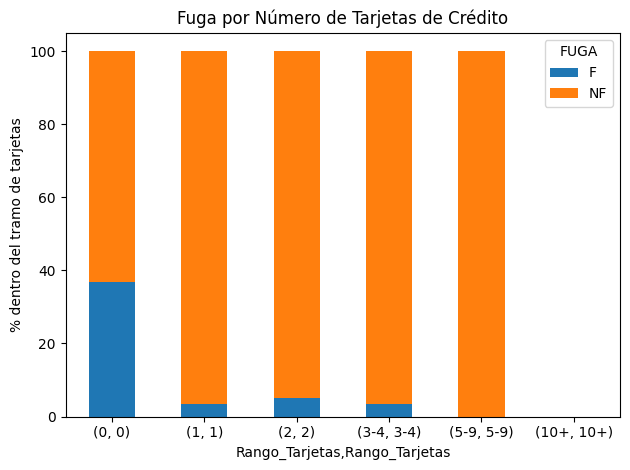

In [ ]:
# Asegurarse que NumTarjCred_T sea numérico
data_set['NumTarjCred_T'] = pd.to_numeric(data_set['NumTarjCred_T'], errors='coerce')


# Crear tramos (bins) para la cantidad de tarjetas. Puedes ajustar según tus datos reales.
bins = [0, 1, 2, 3, 5, 10, float('inf')]
labels = ['0', '1', '2', '3-4', '5-9', '10+']


data_set['Rango_Tarjetas'] = pd.cut(data_set['NumTarjCred_T'], bins=bins, labels=labels, right=False)


# Agrupar por tramo de tarjetas y FUGA
data_set.groupby(['Rango_Tarjetas', 'FUGA']).size()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack().plot.bar(stacked=True)


# Opcionales para presentación
plt.ylabel('% dentro del tramo de tarjetas')
plt.title('Fuga por Número de Tarjetas de Crédito')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
del data_set['Rango_Tarjetas']

El número de tarjetas si es una variable relevante para caracterizar al tipo de cliente que se fuga.

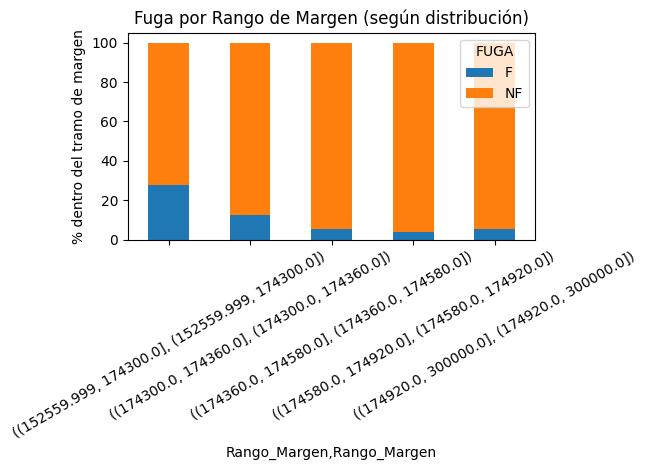

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Asegurarse de que MargenComp_T sea numérico
data_set['MargenComp_T'] = pd.to_numeric(data_set['MargenComp_T'], errors='coerce')


# Crear 5 rangos (quintiles) automáticos basados en la distribución real del margen
data_set['Rango_Margen'] = pd.qcut(data_set['MargenComp_T'], q=5, duplicates='drop')


# Agrupar por tramo de margen y FUGA, calcular porcentajes
grafico = data_set.groupby(['Rango_Margen', 'FUGA']).size() \
    .groupby(level=0).apply(lambda x: 100 * x / x.sum()) \
    .unstack()


# Graficar
grafico.plot.bar(stacked=True)


# Opcionales para presentación
plt.ylabel('% dentro del tramo de margen')
plt.title('Fuga por Rango de Margen (según distribución)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
del data_set['Rango_Margen']

En base a lo anterior, podemos ver como a menor el tramo de margen, tenemos mas fuga.

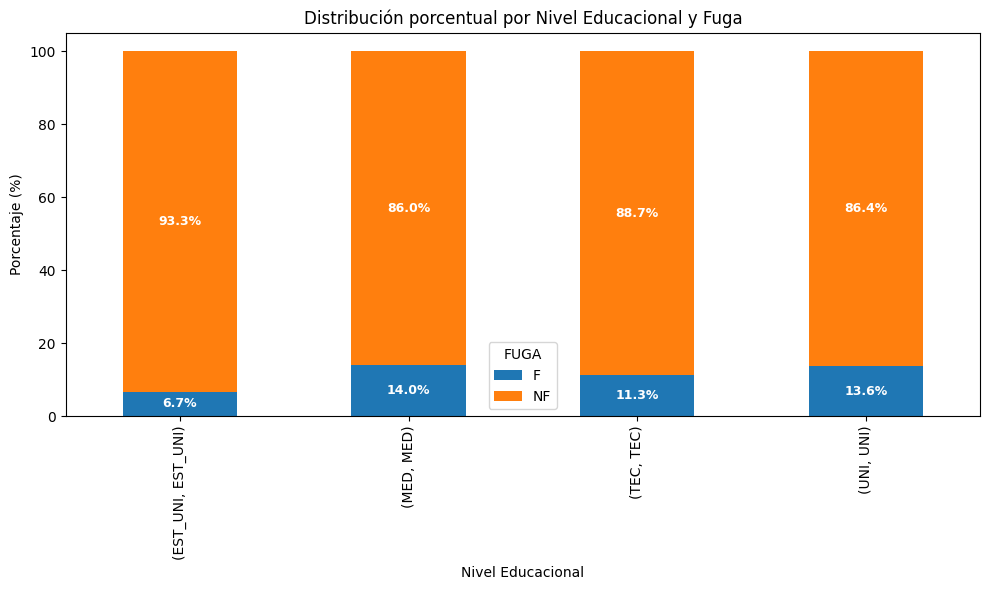

In [ ]:

# Crear el gráfico de barras apiladas
ax = data_set.groupby(['NivelEduc', 'FUGA']).size() \
    .groupby(level=0).apply(lambda x: 100 * x / x.sum()) \
    .unstack().plot.bar(stacked=True, figsize=(10, 6))

# Agregar etiquetas de porcentaje a cada segmento
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}%',  # puedes usar .0f si no quieres decimales
                ha='center',
                va='center',
                fontsize=9,
                color='white',
                fontweight='bold'
            )

plt.title('Distribución porcentual por Nivel Educacional y Fuga')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Nivel Educacional')
plt.tight_layout()
plt.show()



En el nivel edcacional no se observa una tendencia para identificar la Fuga, en otras palabras, se fugan clientes en los 04 tipos de educación definidos

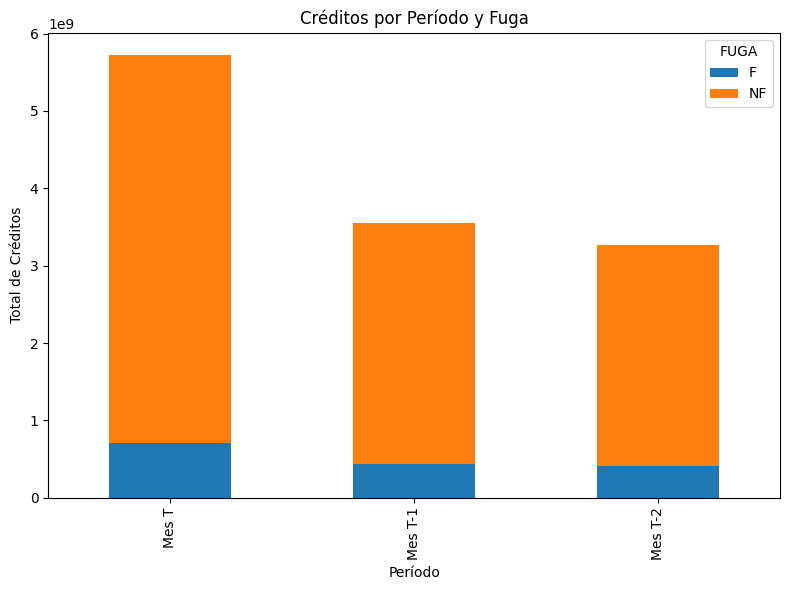

In [ ]:


# Asegurar que las columnas sean numéricas
data_set['CreditMes_T'] = pd.to_numeric(data_set['CreditMes_T'], errors='coerce')
data_set['CreditMes_T-1'] = pd.to_numeric(data_set['CreditMes_T-1'], errors='coerce')
data_set['CreditMes_T-2'] = pd.to_numeric(data_set['CreditMes_T-2'], errors='coerce')

# Reorganizar el DataFrame para facilitar el agrupamiento
df_creditos = pd.melt(
    data_set,
    id_vars='FUGA',
    value_vars=['CreditMes_T', 'CreditMes_T-1', 'CreditMes_T-2'],
    var_name='Periodo',
    value_name='Credito'
)

# Renombrar períodos para más claridad
df_creditos['Periodo'] = df_creditos['Periodo'].replace({
    'CreditMes_T': 'Mes T',
    'CreditMes_T-1': 'Mes T-1',
    'CreditMes_T-2': 'Mes T-2'
})

# Agrupar por período y fuga, y sumar los créditos
df_grouped = df_creditos.groupby(['Periodo', 'FUGA'])['Credito'].sum().unstack().fillna(0)

# Graficar como gráfico de barras apiladas
df_grouped.plot(kind='bar', stacked=True, figsize=(8, 6))

plt.title('Créditos por Período y Fuga')
plt.xlabel('Período')
plt.ylabel('Total de Créditos')
plt.legend(title='FUGA')
plt.tight_layout()
plt.show()



En base al gráfico se observa que si bien el tamaño del crédito aumenta en el mes actual, los clientes se siguen fugando

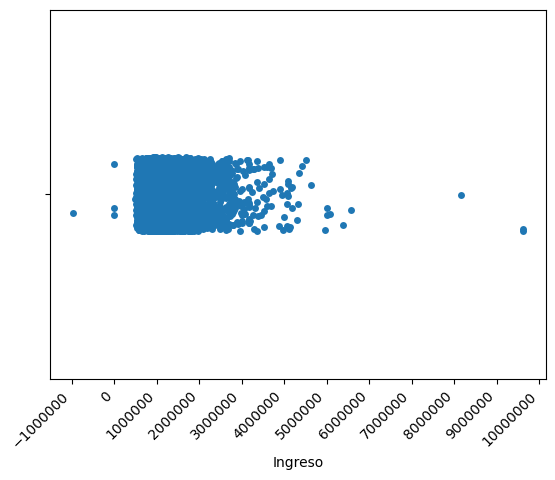

In [ ]:
import matplotlib.ticker as mticker

sn.stripplot(x='Ingreso', data=data_set)

# Format x-axis ticks to avoid scientific notation
formatter = mticker.ScalarFormatter(useOffset=False, useMathText=False)
formatter.set_scientific(False)
plt.gca().xaxis.set_major_formatter(formatter)

# Increase the number of ticks on the x-axis
plt.xticks(rotation=45, ha='right') # Rotate ticks for better readability
plt.locator_params(axis='x', nbins=20) # Increase the number of bins (ticks)

plt.show()

A simple vista vemos una persona que tiene ingresos negativos, y 3 datos atipicos. Podemos comprender que el rango de ingresos se concentra entre 0,5 MM a 3 MM.

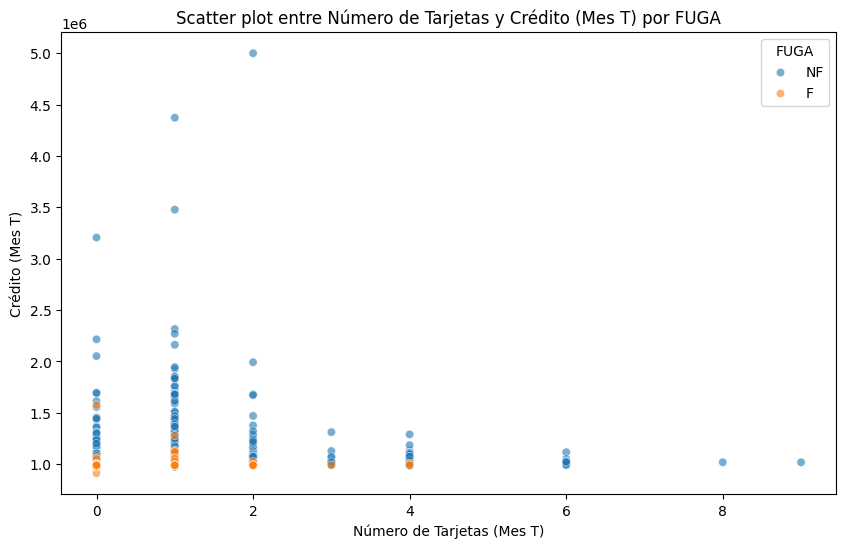

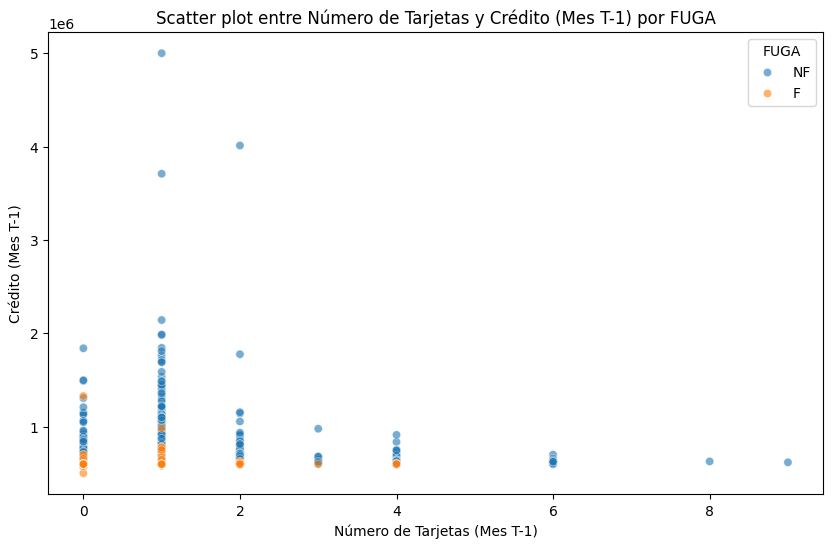

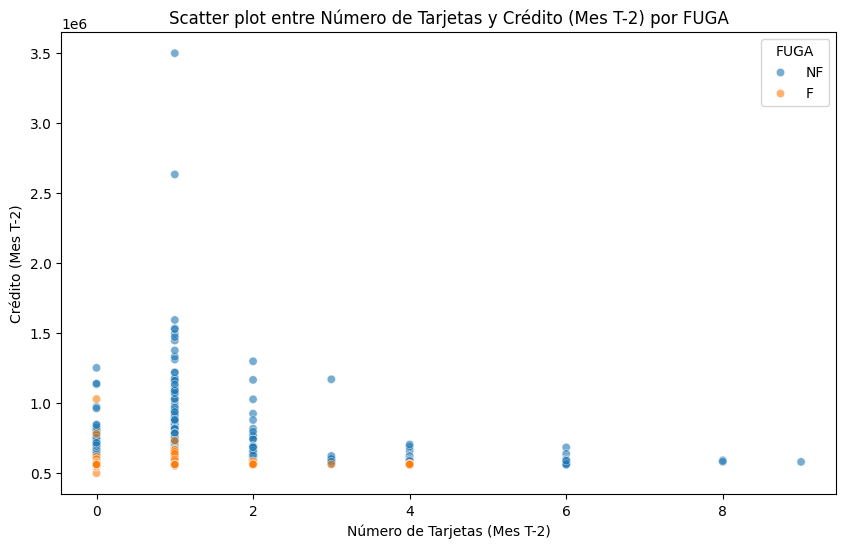

In [ ]:
# prompt: Haz un scatter plot entre el número de tarjetas y la cantidad de crédito

plt.figure(figsize=(10, 6))
sn.scatterplot(x='NumTarjCred_T', y='CreditMes_T', hue='FUGA', data=data_set, alpha=0.6)
plt.title('Scatter plot entre Número de Tarjetas y Crédito (Mes T) por FUGA')
plt.xlabel('Número de Tarjetas (Mes T)')
plt.ylabel('Crédito (Mes T)')
plt.show()

plt.figure(figsize=(10, 6))
sn.scatterplot(x='NumTarjCred_T-1', y='CreditMes_T-1', hue='FUGA', data=data_set, alpha=0.6)
plt.title('Scatter plot entre Número de Tarjetas y Crédito (Mes T-1) por FUGA')
plt.xlabel('Número de Tarjetas (Mes T-1)')
plt.ylabel('Crédito (Mes T-1)')
plt.show()

plt.figure(figsize=(10, 6))
sn.scatterplot(x='NumTarjCred_T-2', y='CreditMes_T-2', hue='FUGA', data=data_set, alpha=0.6)
plt.title('Scatter plot entre Número de Tarjetas y Crédito (Mes T-2) por FUGA')
plt.xlabel('Número de Tarjetas (Mes T-2)')
plt.ylabel('Crédito (Mes T-2)')
plt.show()

En base al análisis de los 03 gráficos se observa que en la medida que disminuye el número de tarjetas y la cantidad del crédito, en los 03 períodos, la cantidad de clientes fugados aumenta y se concentran en la sección inferior izquierda.

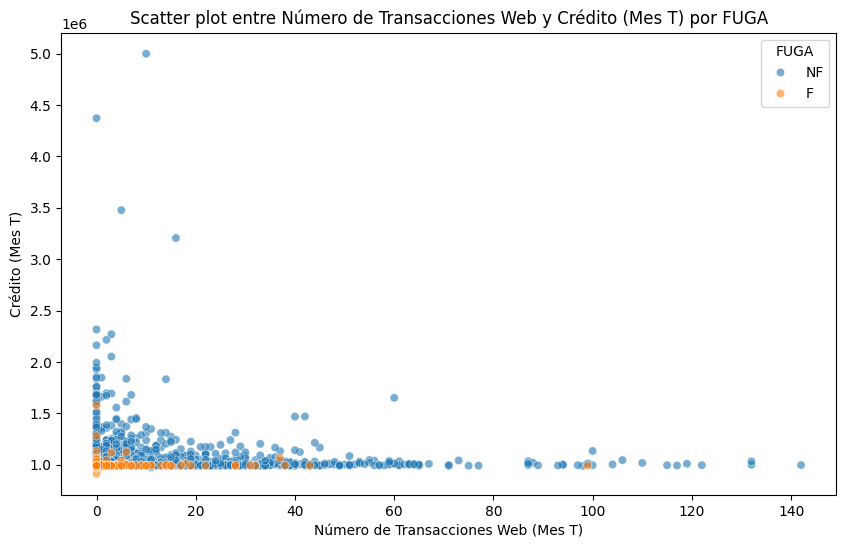

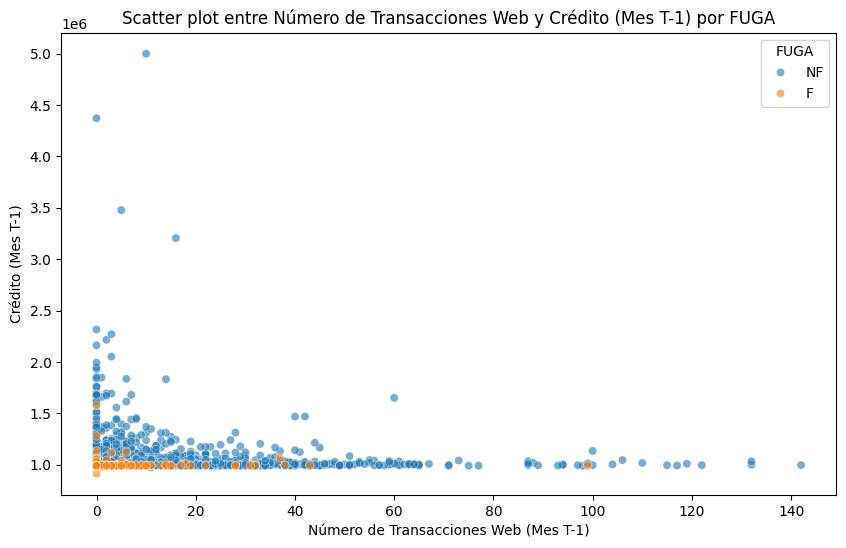

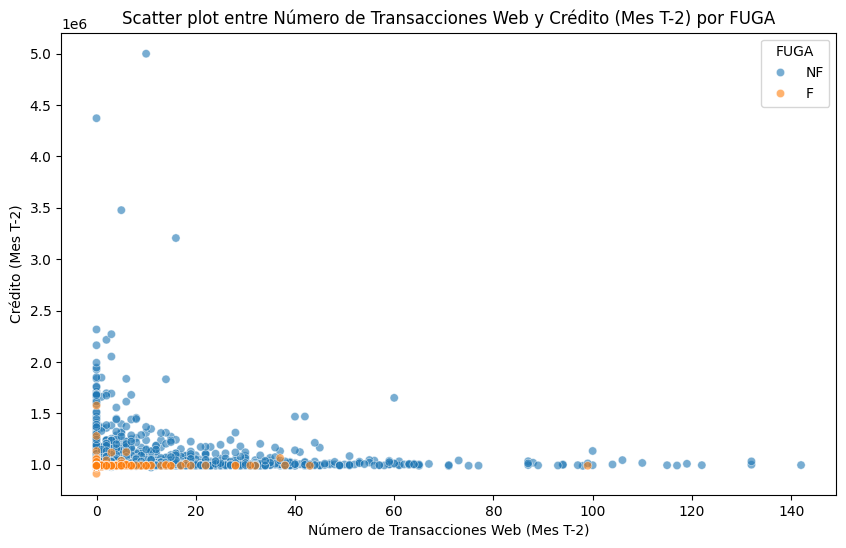

In [ ]:
# prompt: scatter plot de numero de transacciones versus credito

plt.figure(figsize=(10, 6))
sn.scatterplot(x='NumTransWeb_T', y='CreditMes_T', hue='FUGA', data=data_set, alpha=0.6)
plt.title('Scatter plot entre Número de Transacciones Web y Crédito (Mes T) por FUGA')
plt.xlabel('Número de Transacciones Web (Mes T)')
plt.ylabel('Crédito (Mes T)')
plt.show()

plt.figure(figsize=(10, 6))
sn.scatterplot(x='NumTransWeb_T', y='CreditMes_T', hue='FUGA', data=data_set, alpha=0.6)
plt.title('Scatter plot entre Número de Transacciones Web y Crédito (Mes T-1) por FUGA')
plt.xlabel('Número de Transacciones Web (Mes T-1)')
plt.ylabel('Crédito (Mes T-1)')
plt.show()

plt.figure(figsize=(10, 6))
sn.scatterplot(x='NumTransWeb_T', y='CreditMes_T', hue='FUGA', data=data_set, alpha=0.6)
plt.title('Scatter plot entre Número de Transacciones Web y Crédito (Mes T-2) por FUGA')
plt.xlabel('Número de Transacciones Web (Mes T-2)')
plt.ylabel('Crédito (Mes T-2)')
plt.show()

Los gráficos entre créditos solicitados y número de transacciones,nos permite confirmar que a menor número de transacciones, menor es el crédito solicitado, mientras que los clientes fugados se concentran en la sección inferior izquierda. Menos transacciones, menor crédito, mas clientes fugados.

#IV. Descripción metodología preprocesamiento:


**Limpieza de Datos**.

**Inconsistencias.**

In [ ]:
# Detectar valores atípicos
cond_outliers_edad = (data_set['Edad'] < 18) | (data_set['Edad'] > 100)

# Calcular porcentaje de valores atípicos
n_total = data_set['Edad'].notna().sum()
n_outliers = cond_outliers_edad.sum()
porcentaje_outliers = (n_outliers / n_total) * 100

print(f'Valores atípicos en Edad: {n_outliers} de {n_total} ({porcentaje_outliers:.2f}%)')

Valores atípicos en Edad: 3 de 5605 (0.05%)


Para la edad tenemos que solo un 0.05% de valores atipicos (menores de 18 y mayores que 100), por lo que consideramos que en este caso lo mejor es imputar los datos con la mediana.

In [ ]:

# Detectar ingresos negativos (valores atípicos)
cond_outliers_ingreso = data_set['Ingreso'] < 0

# Calcular porcentaje de valores atípicos en Ingreso
n_total_ingreso = data_set['Ingreso'].notna().sum()
n_outliers_ingreso = cond_outliers_ingreso.sum()
porcentaje_outliers_ingreso = (n_outliers_ingreso / n_total_ingreso) * 100

print(f'Valores atípicos en Ingreso (negativos): {n_outliers_ingreso} de {n_total_ingreso} ({porcentaje_outliers_ingreso:.2f}%)')


Valores atípicos en Ingreso (negativos): 1 de 5605 (0.02%)


Para la columna ingreso tenemos un valor negativo por lo que haremos una imputacion por la media.

Hacemos ambas imputaciones.

In [ ]:
mediana_edad = data_set.loc[~cond_outliers_edad, 'Edad'].median()
data_set.loc[cond_outliers_edad, 'Edad'] = mediana_edad

mediana_ingreso = data_set.loc[~cond_outliers_ingreso, 'Ingreso'].median()
data_set.loc[cond_outliers_ingreso, 'Ingreso'] = mediana_ingreso

In [ ]:
data_set.isnull().sum()

,0
CreditMes_T,2
CreditMes_T-1,0
CreditMes_T-2,0
NumTarjCred_T,7
NumTarjCred_T-1,2
NumTarjCred_T-2,0
Ingreso,0
Edad,0
NumTransWeb_T,2
NumTransWeb_T-1,2


Se realiza una imputacion de todas la variables que presentan valores perdidos, se decidio esto porque representan menos que un 5% del total de datos. Remplazaremos por la media en las variables númericas y por la moda en las variables categoricas.

In [ ]:
# Variables categóricas: imputar por moda
data_set['NivelEduc'].fillna(data_set['NivelEduc'].mode(dropna=True)[0], inplace=True)
data_set['EstCivil'].fillna(data_set['EstCivil'].mode(dropna=True)[0], inplace=True)

# Variables numéricas: imputar por media
data_set['CreditMes_T'].fillna(data_set['CreditMes_T'].mean(skipna=True), inplace=True)
data_set['NumTarjCred_T'].fillna(data_set['NumTarjCred_T'].mean(skipna=True), inplace=True)
data_set['NumTarjCred_T-1'].fillna(data_set['NumTarjCred_T-1'].mean(skipna=True), inplace=True)
data_set['NumTransWeb_T'].fillna(data_set['NumTransWeb_T'].mean(skipna=True), inplace=True)
data_set['NumTransWeb_T-1'].fillna(data_set['NumTransWeb_T-1'].mean(skipna=True), inplace=True)
data_set['MargenComp_T'].fillna(data_set['MargenComp_T'].mean(skipna=True), inplace=True)
data_set['MargenComp_T-1'].fillna(data_set['MargenComp_T-1'].mean(skipna=True), inplace=True)
data_set['MargenComp_T-4'].fillna(data_set['MargenComp_T-4'].mean(skipna=True), inplace=True)
data_set['MargenComp_T-5'].fillna(data_set['MargenComp_T-5'].mean(skipna=True), inplace=True)


Corroboramos que no existan valores perdidos en la base de datos:

In [ ]:
data_set.isnull().sum()

,0
CreditMes_T,0
CreditMes_T-1,0
CreditMes_T-2,0
NumTarjCred_T,0
NumTarjCred_T-1,0
NumTarjCred_T-2,0
Ingreso,0
Edad,0
NumTransWeb_T,0
NumTransWeb_T-1,0


**Transformación, Agregación y Corrección de Simetrías.**

**Transformación Box-Cox.**

Se analiza la aplicación de este tipo de transformación para algunas de las varigables, descartando margenComp en los 7 períodos, manteniendo las otras variables.

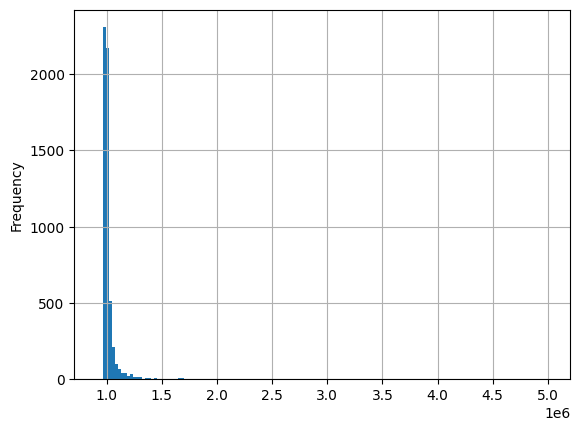

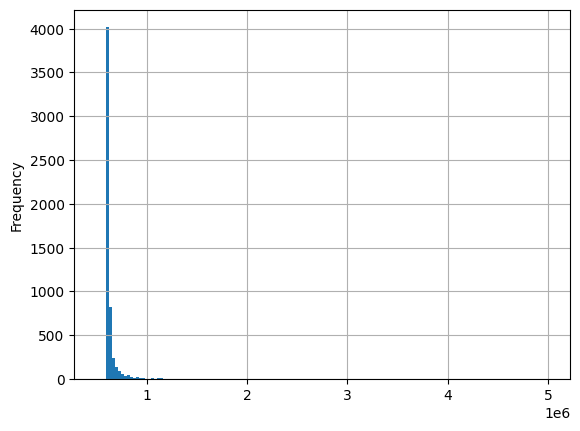

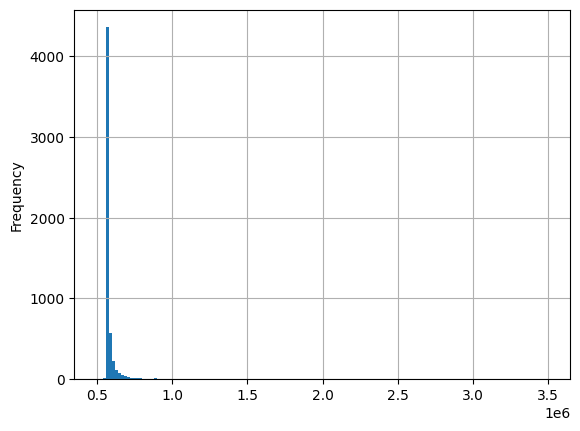

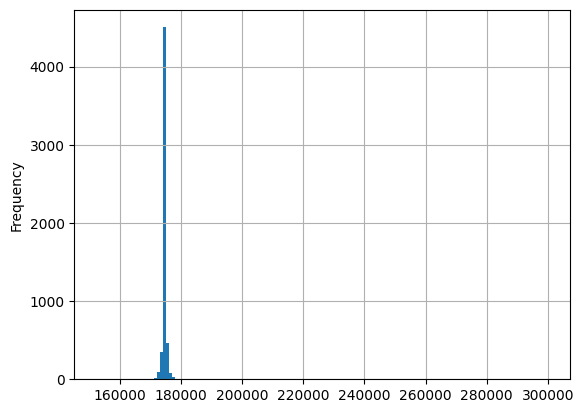

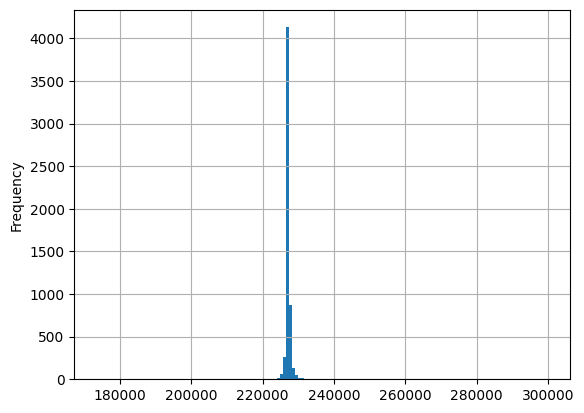

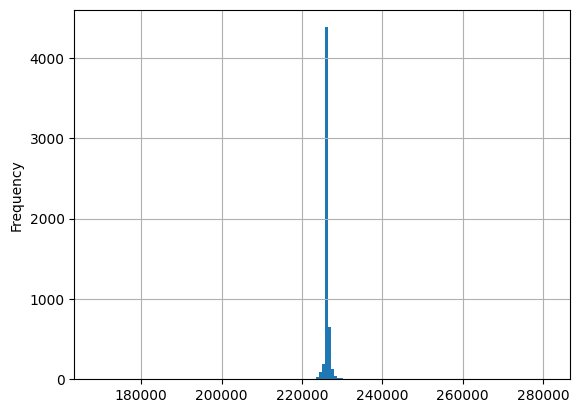

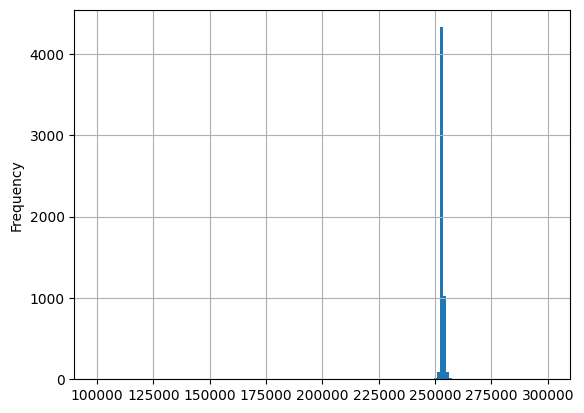

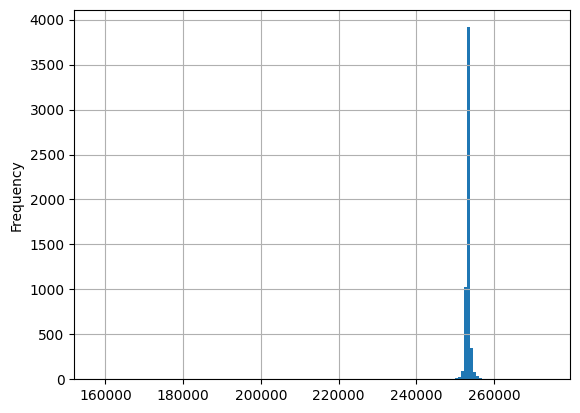

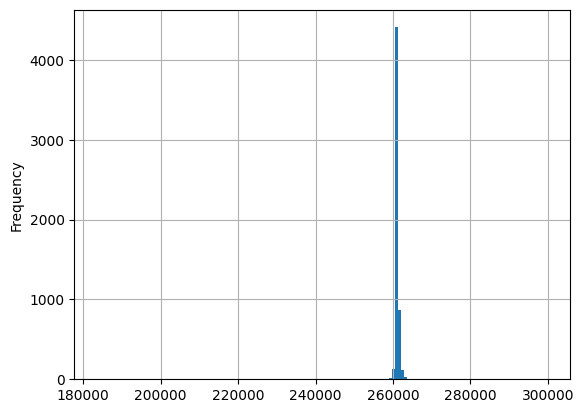

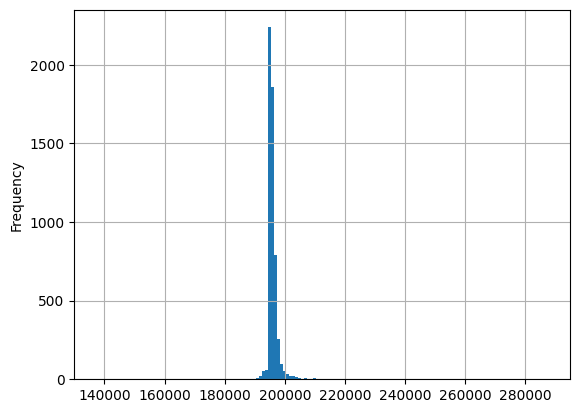

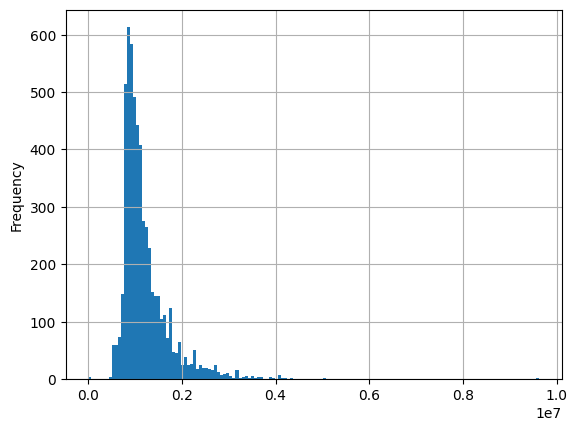

In [ ]:
data_set['CreditMes_T'].plot(kind='hist',bins=150, grid=True )
plt.show()
data_set['CreditMes_T-1'].plot(kind='hist',bins=150, grid=True )
plt.show()
data_set['CreditMes_T-2'].plot(kind='hist',bins=150, grid=True )
plt.show()
data_set['MargenComp_T'].plot(kind='hist',bins=150, grid=True )
plt.show()
data_set['MargenComp_T-1'].plot(kind='hist',bins=150, grid=True )
plt.show()
data_set['MargenComp_T-2'].plot(kind='hist',bins=150, grid=True )
plt.show()
data_set['MargenComp_T-3'].plot(kind='hist',bins=150, grid=True )
plt.show()
data_set['MargenComp_T-4'].plot(kind='hist',bins=150, grid=True )
plt.show()
data_set['MargenComp_T-5'].plot(kind='hist',bins=150, grid=True )
plt.show()
data_set['MargenComp_T-6'].plot(kind='hist',bins=150, grid=True )
plt.show()
data_set['Ingreso'].plot(kind='hist',bins=150, grid=True )
plt.show()

Las variables que son efectivamente asimétricas, se normalizan por lo que le aplicamos su logaritmo (sumar 1 evita que se indefina la función en caso de haber ceros):

In [ ]:
data_set['Ln_CreditMes_T'] = np.log(data_set['CreditMes_T']+1)
data_set['Ln_CreditMes_T-1'] = np.log(data_set['CreditMes_T-1']+1)
data_set['Ln_CreditMes_T-2'] = np.log(data_set['CreditMes_T-2']+1)
data_set['Ln_Ingreso'] = np.log(data_set['Ingreso']+1)

Graficamos nuevamente.

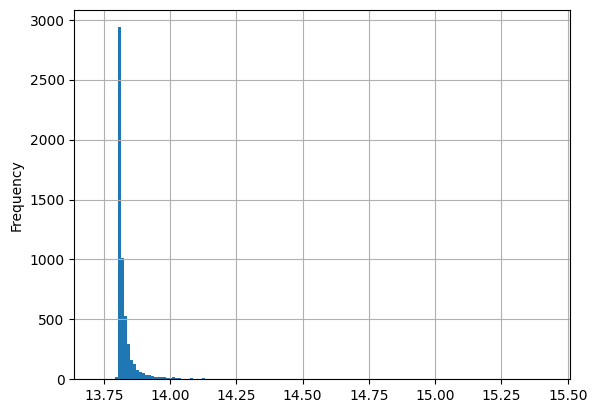

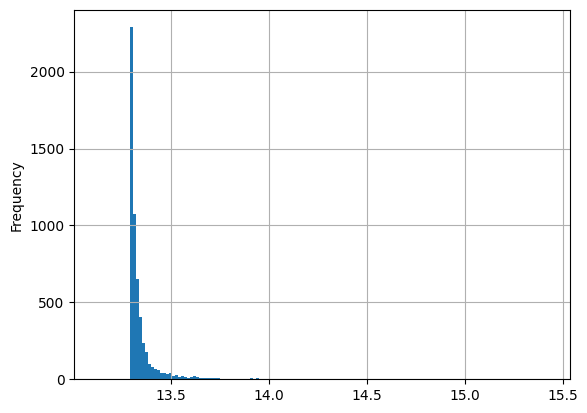

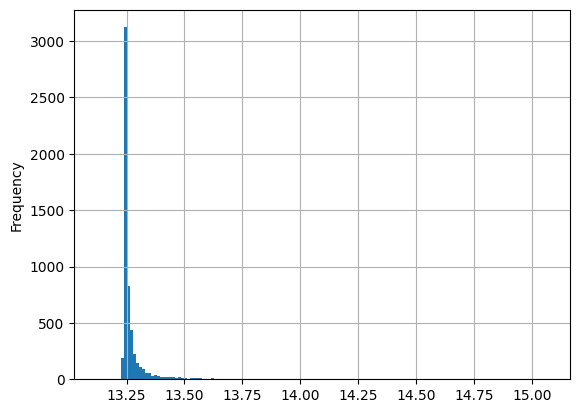

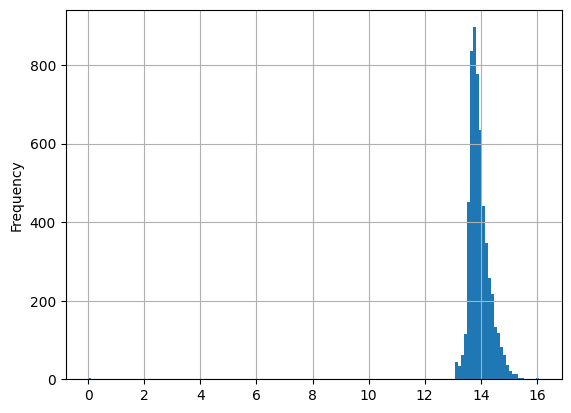

In [ ]:
data_set['Ln_CreditMes_T'].plot(kind='hist',bins=150, grid=True )
plt.show()
data_set['Ln_CreditMes_T-1'].plot(kind='hist',bins=150, grid=True )
plt.show()
data_set['Ln_CreditMes_T-2'].plot(kind='hist',bins=150, grid=True )
plt.show()
data_set['Ln_Ingreso'].plot(kind='hist',bins=150, grid=True )
plt.show()

In [ ]:
del data_set['CreditMes_T']
del data_set['CreditMes_T-1']
del data_set['CreditMes_T-2']
del data_set['Ingreso']

Categórica a binaria

In [ ]:
data_set = pd.get_dummies(data_set, columns = ["Genero"], drop_first = True)
data_set = pd.get_dummies(data_set, columns = ["EstCivil"], drop_first = True)
data_set = pd.get_dummies(data_set, columns = ["NivelEduc"], drop_first = True)
data_set = pd.get_dummies(data_set, columns = ["FUGA"], drop_first = True)
data_set = pd.get_dummies(data_set, columns = ["Region"]) #sin drop_first porque todos toman el mismo valor entonces la elimina
data_set = pd.get_dummies(data_set, columns = ["Telefono"]) #sin drop_first porque todos toman el mismo valor entonces la elimina
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NumTarjCred_T     5605 non-null   float64
 1   NumTarjCred_T-1   5605 non-null   float64
 2   NumTarjCred_T-2   5605 non-null   int64  
 3   Edad              5605 non-null   int64  
 4   NumTransWeb_T     5605 non-null   float64
 5   NumTransWeb_T-1   5605 non-null   float64
 6   NumTransWeb_T-2   5605 non-null   int64  
 7   MargenComp_T      5605 non-null   float64
 8   MargenComp_T-1    5605 non-null   float64
 9   MargenComp_T-2    5605 non-null   int64  
 10  MargenComp_T-3    5605 non-null   int64  
 11  MargenComp_T-4    5605 non-null   float64
 12  MargenComp_T-5    5605 non-null   float64
 13  MargenComp_T-6    5605 non-null   int64  
 14  Ln_CreditMes_T    5605 non-null   float64
 15  Ln_CreditMes_T-1  5605 non-null   float64
 16  Ln_CreditMes_T-2  5605 non-null   float64


#V. Selección de atributos y explicaciones en base a los hallazgos encontrados:

**Inutilidad, Redundancia y Selección de Variables**


**Inutilidad**

In [ ]:
data_set.std()

,0
NumTarjCred_T,0.701550
NumTarjCred_T-1,0.716080
NumTarjCred_T-2,0.728113
Edad,9.044289
NumTransWeb_T,11.327734
NumTransWeb_T-1,8.497524
NumTransWeb_T-2,10.216828
MargenComp_T,2036.708390
MargenComp_T-1,2409.635124
MargenComp_T-2,1967.151050


Eliminamos variables con desviación estándar 0

In [ ]:
del data_set['Region_RM']
del data_set['Telefono_SI']

**Redundancia**

<Axes: >

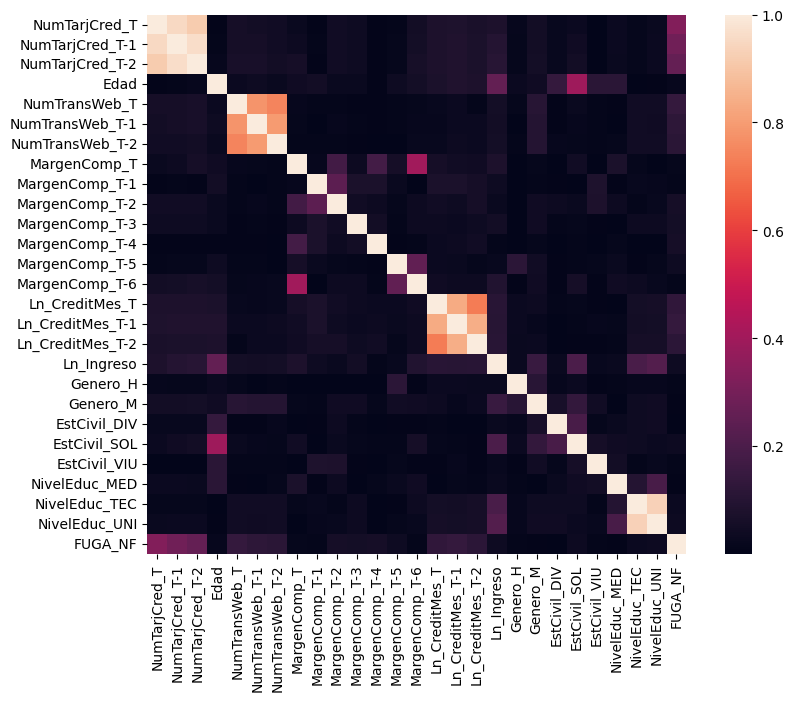

In [ ]:
corrmat = data_set.corr().abs()
f, ax = plt.subplots(figsize=(10, 7))
sn.heatmap(corrmat, square=True)

Se observa que las siguientes variables se encuentran altamente correlacionadas:


*   CreditMes_T con CreditMes_T-1 & CreditMes_T-2
*   NumTarjCred_T con NumTarjCred_T-1 & NumTarjCred_T-2
*   NumTransWeb_T con NumTransWeb_T-1 & NumTransWeb_T-2

Analizaremos su relevancia para seleccionar una variable:



In [ ]:
# Calcular la matriz de correlación absoluta
corrmat = data_set.corr().abs()

# Crear una máscara para quedarnos solo con la parte superior de la matriz
mask = np.triu(np.ones(corrmat.shape), k=1).astype(bool)

# Aplicar la máscara y transformar a formato largo
high_corr = corrmat.where(mask).stack()

# Filtrar solo las correlaciones mayores a 0.8
high_corr = high_corr[high_corr > 0.8]

# Mostrar los pares de columnas con alta correlación
print("Pares de columnas con correlación > 0.8:")
print(high_corr.sort_values(ascending=False))


Pares de columnas con correlación > 0.8:
NumTarjCred_T-1   NumTarjCred_T-2     0.963616
NumTarjCred_T     NumTarjCred_T-1     0.950262
NivelEduc_TEC     NivelEduc_UNI       0.929787
NumTarjCred_T     NumTarjCred_T-2     0.914871
Ln_CreditMes_T-1  Ln_CreditMes_T-2    0.841618
Ln_CreditMes_T    Ln_CreditMes_T-1    0.834110
dtype: float64


In [ ]:
# Correlate the three 'CreditMes' variables
variables_transacciones = ['Ln_CreditMes_T', 'Ln_CreditMes_T-1', 'Ln_CreditMes_T-2']
correlacion_transacciones = corrmat.loc[variables_transacciones, variables_transacciones]

print("Correlación entre Ln_CreditMes_T, Ln_CreditMes_T-1, Ln_CreditMes_T-2:")
print(correlacion_transacciones)

Correlación entre Ln_CreditMes_T, Ln_CreditMes_T-1, Ln_CreditMes_T-2:
                  Ln_CreditMes_T  Ln_CreditMes_T-1  Ln_CreditMes_T-2
Ln_CreditMes_T          1.000000          0.834110          0.723666
Ln_CreditMes_T-1        0.834110          1.000000          0.841618
Ln_CreditMes_T-2        0.723666          0.841618          1.000000


In [ ]:
# Correlate the three 'NumTarjCred_T' variables
variables_transacciones = ['NumTarjCred_T', 'NumTarjCred_T-1', 'NumTarjCred_T-2']
correlacion_transacciones = corrmat.loc[variables_transacciones, variables_transacciones]

print("Correlación entre NumTarjCred_T, NumTarjCred_T-1, NumTarjCred_T-2:")
print(correlacion_transacciones)

Correlación entre NumTarjCred_T, NumTarjCred_T-1, NumTarjCred_T-2:
                 NumTarjCred_T  NumTarjCred_T-1  NumTarjCred_T-2
NumTarjCred_T         1.000000         0.950262         0.914871
NumTarjCred_T-1       0.950262         1.000000         0.963616
NumTarjCred_T-2       0.914871         0.963616         1.000000


In [ ]:
# Correlate the three 'NumTransWeb' variables
variables_transacciones = ['NumTransWeb_T', 'NumTransWeb_T-1', 'NumTransWeb_T-2']
correlacion_transacciones = corrmat.loc[variables_transacciones, variables_transacciones]

print("Correlación entre NumTransWeb_T, NumTransWeb_T-1, NumTransWeb_T-2:")
print(correlacion_transacciones)

Correlación entre NumTransWeb_T, NumTransWeb_T-1, NumTransWeb_T-2:
                 NumTransWeb_T  NumTransWeb_T-1  NumTransWeb_T-2
NumTransWeb_T         1.000000         0.780248         0.745128
NumTransWeb_T-1       0.780248         1.000000         0.793350
NumTransWeb_T-2       0.745128         0.793350         1.000000


**Relevancia**

Aplicamos test chi cuadrado para analizar la relevancia para variables NumTarjCred

In [ ]:
cut_points = data_set['NumTarjCred_T'].quantile([0, .2, .4, .6, .8, 1])
NumTarjCred_T_binned = pd.cut(data_set['NumTarjCred_T'], bins=cut_points, include_lowest=True, duplicates='drop')

cut_points = data_set['NumTarjCred_T-1'].quantile([0, .2, .4, .6, .8, 1])
NumTarjCred_T1_binned = pd.cut(data_set['NumTarjCred_T-1'], bins=cut_points, include_lowest=True, duplicates='drop')

cut_points = data_set['NumTarjCred_T-2'].quantile([0, .2, .4, .6, .8, 1])
NumTarjCred_T2_binned = pd.cut(data_set['NumTarjCred_T-2'], bins=cut_points, include_lowest=True, duplicates='drop')


Ahora que tenemos las variables discretizadas, calculamos chi cuadrado

In [ ]:
tbl = pd.crosstab(index=NumTarjCred_T_binned,columns=data_set['FUGA_NF'])
stat, p, dof, expected =chi2_contingency(tbl)
print('Valor chi cuadrado = %d' % stat)
print('P-valor =%f' % p)
tbl = pd.crosstab(index=NumTarjCred_T1_binned, columns=data_set['FUGA_NF'])
stat, p, dof, expected =chi2_contingency(tbl)
print('Valor chi cuadrado = %d' % stat)
print('P-valor =%f' % p)
tbl = pd.crosstab(NumTarjCred_T2_binned, columns=data_set['FUGA_NF'])
stat, p, dof, expected =chi2_contingency(tbl)
print('Valor chi cuadrado = %d' % stat)
print('P-valor =%f' % p)

Valor chi cuadrado = 25
P-valor =0.000000
Valor chi cuadrado = 23
P-valor =0.000002
Valor chi cuadrado = 21
P-valor =0.000004


Dado el análisis de chi cuadrado nos quedamos con NumTarjCred_T y se eliminan las otras variables

In [ ]:
del data_set['NumTarjCred_T-1']
del data_set['NumTarjCred_T-2']

Selección de variables mas relevantes SelectKBest método, se definen variables de ejes X e Y:

In [ ]:
X = data_set.loc[:, data_set.columns != 'FUGA_NF']
y = data_set.loc[:, data_set.columns == 'FUGA_NF']
X.shape

(5605, 24)

Ahora aplicamos la función SelectKBest con el test F de Fisher para determinar las variables más relevantes.


In [ ]:
# Check for and handle infinite or very large values in X
# Replace infinite values with NaN, then impute NaN values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())

X_new = SelectKBest(k=5).fit(X, y.values.ravel())
print(X_new.scores_)
print(X_new.pvalues_)

[677.28003722   1.77385705 107.34612761  82.8982892   68.92310522
   1.12241986   0.45226873  18.02751237  15.53854549  17.65548636
   8.16064846   0.51540044  94.54683936 109.96229187  77.11988376
   7.08634066   0.52191542   0.14888307   0.00077921   6.50895066
   0.6053021    0.15154363   5.38572258   6.44372841]
[0.         0.18295963 0.         0.         0.         0.28944366
 0.50128727 0.00002213 0.00008182 0.00002689 0.00429667 0.47284028
 0.         0.         0.         0.00778955 0.47005591 0.69961968
 0.97773142 0.01075962 0.436595   0.69707935 0.0203379  0.01116131]


In [ ]:

# Obtener máscara de variables seleccionadas (opcional)
mask = X_new.get_support()

# Crear DataFrame con nombres, scores y p-values
results = pd.DataFrame({
    'Feature': X.columns,
    'Score': X_new.scores_,
    'P_value': X_new.pvalues_
})

# Ordenar por Score descendente (más relevante primero)
results_sorted = results.sort_values(by='Score', ascending=False).reset_index(drop=True)

print(results_sorted)

             Feature       Score        P_value
0      NumTarjCred_T  677.280037  4.708215e-141
1   Ln_CreditMes_T-1  109.962292   1.717662e-25
2      NumTransWeb_T  107.346128   6.269902e-25
3     Ln_CreditMes_T   94.546839   3.580673e-22
4    NumTransWeb_T-1   82.898289   1.178913e-19
5   Ln_CreditMes_T-2   77.119884   2.107076e-18
6    NumTransWeb_T-2   68.923105   1.271012e-16
7     MargenComp_T-2   18.027512   2.212572e-05
8     MargenComp_T-4   17.655486   2.688651e-05
9     MargenComp_T-3   15.538545   8.182480e-05
10    MargenComp_T-5    8.160648   4.296667e-03
11        Ln_Ingreso    7.086341   7.789546e-03
12      EstCivil_SOL    6.508951   1.075962e-02
13     NivelEduc_UNI    6.443728   1.116131e-02
14     NivelEduc_TEC    5.385723   2.033790e-02
15              Edad    1.773857   1.829596e-01
16      MargenComp_T    1.122420   2.894437e-01
17      EstCivil_VIU    0.605302   4.365950e-01
18          Genero_H    0.521915   4.700559e-01
19    MargenComp_T-6    0.515400   4.728

Se descartan variables con P<0,05

In [ ]:
del data_set['EstCivil_DIV']

#VI. Conclusiones y discusiones:

A través del análisis descriptivo, la transformación de variables y la selección de atributos, se pueden obtener la siguientes conclusiones respecto al caso planteado en fuga de clientes para la entidad financiera.

1.   En un primer análisis, al respecto de los clientes fugados, la mayoría no realiza transacciones web frecuentes (mediana = 0). Tienen en general entre 29 y 41 años (rango intercuartílico), más del 75 % tiene 0 tarjetas de crédito y tienen una baja actividad en línea (38,7 % de los clientes fugados realizó al menos una transacción web en alguno de los últimos 3 períodos, en otras palabras, casi 6 de cada 10 clientes fugados nunca usaron transacciones web en los tres meses analizados.)

2.   Se observa que los clientes fugados presentan ingresos promedio ligeramente más altos en comparación con los clientes que cuentan con cumplimineto de obligaciones crediticas. Lo que sugiere que el nivel de ingreso podría ser uno de los factores para la decisión de fuga.

3.   Por otra parte, dentro del análisis de transacciones web y el crédito mensual, se logra observar que los clientes fugados tienden a mostrar menor patrón en generación de transacciones digitales. Lo que puede indicar una menor gestión en los digitales para los clientes no fugados. Adicionalmente, el número de tarjetas de crédito tambien es menor en el caso de los clientes fugados, siendo esta una tendencia a monitorear para identificar si un cliente podría potencialmente fugarse.

4.   En cuanto al nivel educacional, se identifica que los usuarios con Nivel Educacional "MEDIO o SUPERIOR" parece tener una mayor probabilidad de fuga.

5.   Con relación a los atributos proporcionados en el Score, se indica que las 5 variables relevantes para predecir la fuga son NumTarjCred, CreditMes, CreditMes, Ingreso y MargenComp. Siendo esta última crucial, ya que los clientes que dejan menor rentabilidad a menudo buscan otras opciones.

6.   Asimismo se identificaron algunas variables con alta correlación entre sí por encima de 0.8, lo que podría indicar cierta redundancia. Lo que sugiere que una de ellas podría ser eliminada sin una pérdida significativa de información predictiva para el modelo.

Adicionalmente, la información obtenida resulta de vital importancia para la entidad financiera, ya que permite la identificación proactiva de clientes en riesgo de fuga. Al monitorear las variables clave identificadas bajos NumTransWeb_T o CreditMes_T, donde es posible:

1.   Desarrollar estrategias de optimización para la detección de clientes en riesgo crediticio, ya sea a través de incentivos, mayor asesoría o atención personalizada. Así como también, diseñar campañas de comunicación que se adecuen a las necesidades de los usuarios en los cuales sea posible abordar comportamientos con la finalidad de mitigar la fuga y mejorar la experiencia del cliente para comprender factores que puedan provocar la misma. Desde el análisis descrtiptivo y estadístico de la información, en la medida que los clientes aumenten el número de tarjetas de su cuenta, aumentarán el número de transacciones, aumentando la cantidad del crédito y extendiendo la permanencia y su clasificación como cliente no fugado. La estrategia de retención debería apuntar a estas 3 variables, sobretodo en el aseguramiento de que los clientes tengan al menos 01 tarjeta, esto disminuirá el % de fuga aproximadamente en un 25%

2.   Por otra parte, este análisis se basa en un conjunto de datos histórico limitado a un período específico, lo que podría no capturar cambios recientes en el comportamiento del cliente o bien, las condiciones del mercado.

3.   Finalmente, las correlaciones identificadas no implican causalidad, es decir, no es posible asegurar que un factor cause la fuga, solo que están asociados, por ejemplo, algunas variables importantes que podrían influir en la fuga podrían ser, satisfacción del cliente, reclamos o tasa de satisfacción no estaban disponibles en el dataset analizado.

Para terminar, el análisis se centra en la fuga, lo que no considera otros tipos de deserción.